# Basic statistics
Python activities to complement *Measurements and their Uncertainties*, Chapter 2, "Random errors in measurements."

Author: J. S. Dodge, 2019©

* [Preliminaries](#Preliminaries)
* [Basic statistics with NumPy](#Basic-statistics-with-NumPy)
    * [Location and width](#Location-and-width)
        * [Programming notes 1](#Programming-notes-1)
        * [Programming notes 2](#Programming-notes-2)
    * [Exercise 1](#Exercise-1)
* [Parent distributions](#Parent-distributions)
    * [Goals of statistics](#Goals-of-statistics)
* [The parent distribution for `rand`](#The-parent-distribution-for-rand)
    * [Exercise 2](#Exercise-2)
    * [Continuous distributions and the probability density function](#Continuous-distributions-and-the-probability-density-function)
    * [The standard uniform distribution](#The-standard-uniform-distribution)
    * [Exercise 3](#Exercise-3)
    * [The general uniform distribution](#The-general-uniform-distribution)
    * [Exercise 4](#Exercise-4)
    * [Exercise 5](#Exercise-5)
* [The normal distribution](#The-normal-distribution)
    * [The standard normal distribution](#The-standard-normal-distribution)
        * [Programming notes 3](#Programming-notes-3)
    * [Aside on the Gaussian integral](#Aside-on-the-Gaussian-integral)
    * [Sampling the standard normal distribution with `randn`](#Sampling-the-standard-normal-distribution-with-randn)
    * [The general normal distribution](#The-general-normal-distribution)
        * [Programming notes 4](#Programming-notes-4)
    * [Exercise 6](#Exercise-6)
* [Back to the mean and standard deviation](#Back-to-the-mean-and-standard-deviation)
    * [Estimating the parent distribution from a sample](#Estimating-the-parent-distribution-from-a-sample)
    * [Consistency of the estimates for the mean and standard deviation](#Consistency-of-the-estimates-for-the-mean-and-standard-deviation)
    * [Exercise 7](#Exercise-7)
    * [The standard error](#The-standard-error)
        * [Programming notes 5](#Programming-notes-5)
    * [The error in the error](#The-error-in-the-error)
* [Reporting results](#Reporting-results)
    * [How to interpret the mean ± the standard error](#How-to-interpret-the-mean-±-the-standard-error)
    * [Formatting numbers in Python](#Formatting-numbers-in-Python)
* [Summary](#Summary)

## Preliminaries
Before proceeding with this notebook you should review the topics from the [previous notebook](1.0-Random-numbers.ipynb) and read *MU* Ch. 2, "Random errors in measurements," with the following [goals](https://wiki.its.sfu.ca/departments/phys-students/index.php/Reading_goals_for_Hughes_and_Hase#Random_error_in_measurements) in mind.

1. Be able to use the mean and standard deviation to characterize a statistical sample. Specifically, be able to:
    1. Estimate the mean and standard deviation from a histogram;
    2. Sketch a distribution with a given mean and standard deviation;
    3. Calculate the mean for a set of measurements;
    4. Calculate the standard deviation for a set of measurements.
2. Know the functional form for a Gaussian distribution, be able to sketch it for a given mean and standard deviation, and be able to estimate the mean and standard deviation from the plot of a Gaussian distribution.
3. Be able to discuss the relationships between a sample and its parent distribution.
4. Be able to discuss the difference between the standard deviation and the standard deviation in the mean (aka the standard error), and be able to estimate both from a histogram of measurements.
5. Be able to report uncertainties correctly for a given measurement.

You already know how to import libraries and tell the Jupyter notebook server how to display plots from Matplotlib, so we will get this out of the way now in the following code cell.

In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

%matplotlib inline

## Basic statistics with NumPy

###  Location and width
NumPy includes several basic [statistics routines](https://numpy.org/devdocs/reference/routines.statistics.html) for characterizing a sample from a statistical distribution. The following code cell applies several of them to the results in *MU* Table 2.1. The most common ones, the mean and the standard deviation, provide estimates of the *location* and *width*, respectively, of the underlying distribution.

#### Programming notes 1
In both the [`std`](https://numpy.org/devdocs/reference/generated/numpy.std.html) and the [`var`](https://numpy.org/devdocs/reference/generated/numpy.var.html) functions it is important to set the option `ddof=1` for consistency with *MU* Eq. (2.3). The documentation for both functions describes this option as follows.
> “Delta Degrees of Freedom”: the divisor used in the calculation is `N - ddof`, where `N` represents the number of elements. By default `ddof` is zero.

What this means is that the default usage of `std` with `ddof=0` returns what is known as the  *population standard  deviation*,

<a id="std-pop"></a>$$\sigma_N = \sqrt{\frac{1}{N}\sum_{i=1}^N(x_i - \bar{x})^2}\quad\text{(Default, ddof=0)},$$

and with `ddof=1` it returns the expression given in Eq. (2.3), also known as the *sample standard deviation*,

<a id="std-samp"></a>$$\sigma_{N-1} = \sqrt{\frac{1}{N-1}\sum_{i=1}^N(x_i - \bar{x})^2}\quad\text{(Preferred, ddof=1)}.$$

The options `ddof=0` and `ddof=1` are also called *uncorrected* and *corrected*, respectively, for reasons that we will discuss shortly.

Both options are shown below, and you will see that the difference is not that large. Since we will normally only need to know the standard deviation to one significant figure anyway, the error we get by forgetting to set `ddof=1` is usually unimportant. The two options are quite different conceptually, however, so you should get in the habit of using `ddof=1` in this context.

And just to be sure that `mean` and `std` are doing what we think they are doing, we use the NumPy [`sum`](https://numpy.org/devdocs/reference/generated/numpy.sum.html) function and the built-in Python [`len`](https://docs.python.org/3/library/functions.html#len) function to evaluate them explicitly. These expressions are long, so we break them and continue (with indentation) on the next line—see the [Style Guide for Python Code](https://www.python.org/dev/peps/pep-0008) for more on this and other conventions.

In [2]:
period = [10.0, 9.4, 9.8, 9.6, 10.5, 9.8, 10.3, 10.2, 10.4, 9.3]

print("Mean: ", np.mean(period))
print("Mean (explicit): ", np.sum(period)/len(period))
print("Median: ", np.median(period))
print()

print("Standard deviation (uncorrected): ", np.std(period))
print("Standard deviation (uncorrected, explicit): ", 
      np.sqrt(np.sum((period - np.mean(period))**2)/len(period)))
print("Variance (uncorrected): ", np.var(period))
print()

print("Standard deviation (corrected): ", np.std(period, ddof=1))
print("Standard deviation (corrected, explicit): ", 
      np.sqrt(np.sum((period - np.mean(period))**2)/(len(period)-1)))
print("Variance (corrected): ", np.var(period, ddof=1))
print()

print("Minimum: ", np.amin(period))
print("Maximum: ", np.amax(period))
print("Range (peak-to-peak): ", np.ptp(period))

Mean:  9.93
Mean (explicit):  9.93
Median:  9.9

Standard deviation (uncorrected):  0.3976179070414207
Standard deviation (uncorrected, explicit):  0.3976179070414207
Variance (uncorrected):  0.15809999999999988

Standard deviation (corrected):  0.419126074906664
Standard deviation (corrected, explicit):  0.419126074906664
Variance (corrected):  0.17566666666666653

Minimum:  9.3
Maximum:  10.5
Range (peak-to-peak):  1.1999999999999993


#### Programming notes 2
The last result in the above cell looks worrisome: shouldn't we get 10.5 – 9.3 = 1.2? But it turns out that this is [just what we expect](https://docs.python.org/3/tutorial/floatingpoint.html), once we recognize that the computer uses a  binary representation of floating-point numbers that has finite precision. To see this, we calculate 10.5 – 9.3 – 1.2 in a few different ways.

In [3]:
print(10.5 - 9.3 - 1.2)
print((10.5 - 9.3) - 1.2)
print(10.5 - (9.3 + 1.2))

-6.661338147750939e-16
-6.661338147750939e-16
0.0


Most computers have 53 bits of floating-point precision, so the best we can expect for any number is a relative precision of 2<sup>-53</sup>. In this calculation,  10.5 has an exact binary representation, but 9.3 and 1.2 are both infinitely repeating fractions that must be truncated. These errors cancel in the last of the three calculations, but not in the first two (which are equivalent, given Python's order-of-operations rules). The cell below shows that the magnitude of overall truncation error is exactly $6\times 2^{-53}$.

In [4]:
print(2**(-53))
print(10.5 - 9.3 - 1.2 + 6*2**(-53))

1.1102230246251565e-16
0.0


Very few experiments ever approach this level of precision, of course. The only reason this came up in our simple  calculation is because numbers are expressed by default with excessive precision—later we will see how to format numerical expressions to the correct precision in Python.

### Exercise 1
*MU* Prob. (2.1) gives a set of volume measurements, all in milliliters: 25.8, 26.2,  26.0, 26.5, 25.8, 26.1, 25.8, and 26.3. Use NumPy to calculate the mean, the standard deviation $\sigma_{N-1}$, and the total range of the data.

In [5]:
# Use this cell for your response, adding cells if necessary.

## Parent distributions

*MU* Sec. 2.6 introduces the concepts of a *sample* and a *parent distribution*, fundamental concepts in statistics that allows us to connect *what we actually measure* (the sample) to a *mathematical model for the measurement* (the parent distribution). A canonical example that illustrates this difference is a coin flip. Before we flip the coin, we *expect* it to come up *Heads* or *Tails* with equal probability: our parent distribution is then

$$ P(x) = \begin{cases}
  \frac{1}{2} & \text{for}\ x =\ \text{Heads,} \\[1ex]
    \frac{1}{2} & \text{for}\ x =\ \text{Tails,}
  \end{cases} $$
  
where $P(x)$ denotes the probability of obtaining a result $x$. When we actually flip a coin, however, the result is always *either* *Heads* or *Tails*, and it no longer makes sense to describe this probabilistically. The result is a *sample* that has been *drawn* from the parent distribution.

### Goals of statistics

Now that we have defined these two concepts, we can identify some of the most important goals of statistics:
1. Determine the properties of a parent distribution from knowledge of a sample drawn from it,
2. Predict the properties of a sample from knowledge of the parent distribution, and
3. Determine the probability that a given sample was drawn from a given parent distribution.

In the context of experimental physics, this translates into
1. Develop a mathematical model to describe a set of experimental measurements,
2. Predict the results of an experiment using a mathematical model, and
3. Assess the agreement between a mathematical model and an experiment.

It is not an exaggeration to say that most of science can be reduced to these three activities.

## The parent distribution for `rand`
Let's start with the first item: determining the parent distribution of `rand` from the samples that it generates. This is a bit artificial since we know that `rand` was *designed* with a particular parent distribution in mind, but it serves as an example of how we would proceed if the underlying parent distribution were unknown.

### Exercise 2
Run the code cell below to produce a histogram of `n = 10` samples from `rand`. Next, duplicate the entire cell, increase `n` by a factor of 10, and run it again. Repeat this procedure until you are satisfied that the sample histogram accurately reflects the underlying parent distribution. (To duplicate the cell you may use the Jupyter menu selections *`Edit > Copy Cells`* and *`Edit > Paste Cells Below`*, or you can just select the *`+`* item from the menu bar to create a new cell, then copy and paste the contents from the one above it.)

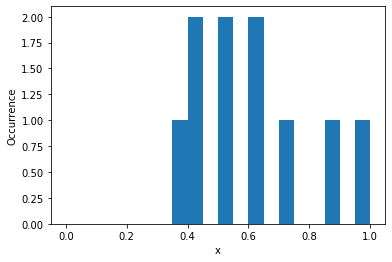

In [6]:
n = 10
random.seed(0)
x_rand = random.rand(n)

plt.hist(x_rand,bins=20,range=(0.0,1.0))
plt.xlabel('x')
plt.ylabel('Occurrence');

###  Continuous distributions and the probability density function
These histograms reveal an important difference between `rand` and our earlier example of a coin flip. With a coin flip we have only two possible outcomes, *Heads* or *Tails*, so when we specify the parent distribution we can just assign a discrete probability to each one. And while this is also true of the numbers returned by `rand`, since the number of floating-point numbers between 0.0 and 1.0 is large but [ultimately finite](https://lemire.me/blog/2017/02/28/how-many-floating-point-numbers-are-in-the-interval-01/), it is more convenient to consider them as elements of the continuous, *infinite* set $\{x|x\in\mathbb{R}, 0\le x \le 1\}$, where $\mathbb{R}$ represents the set of real numbers. In this case, the probability of drawing any *specific* number between 0 and 1 is infinitesimal, so the approach that we used with the coin flip is unsuitable. Instead of assigning probabilities to specific *values* of $x$, then, we assign probabilities to specific *intervals*. We define the *probability density function* (also known as the probability distribution function, or PDF), $P_\text{DF}(x)$, through the integral relationship

$$P(x_1 \le x \le x_2) = \int_{x_1}^{x_2}\text{d}x\,P_\text{DF}(x),$$

for all $x_1$ and $x_2$ (see also *MU* Sec. 3.1).

### The standard uniform distribution
We can now describe the parent distribution for `rand` as

$$P_\text{DF}(x) =\begin{cases}
  1 & \text{for}\ 0 \le x \le 1, \\[1ex]
  0 & \text{otherwise,}
  \end{cases}$$
  
which is known as the *standard uniform distribution.*

### Exercise 3
Use the definition of $P_\text{DF}(x)$ for the standard uniform distribution to compute the following probabilities and record them in the following Markdown cell.
1. $P(0 \le x \le 0.5)$
2. $P(0.2 \le x \le 0.25)$
3. $P(0 \le x \le 1)$
4. $P(-1 \le x \le 0)$
5. $P(0.75 \le x \le 2)$
6. $P(-\infty \le x \le \infty)$

**Select this cell and enter your response to Exercise 3 here.**
1. 
2. 
3. 
4. 
5. 
6. 

### The general uniform distribution
The *general uniform distribution* has a PDF that is constant over the interval $[a,b]$ and zero elsewhere:

$$\mathcal{U}(x;a,b) = P_\text{DF}(x;a,b) =\begin{cases}
  \frac{1}{b - a} & \text{for}\ a \le x \le b, \\[8pt]
  0 & \text{otherwise,}
  \end{cases}$$
  
In this notation, the standard uniform distribution may be written as $\mathcal{U}(x;0,1)$, or $X\sim\mathcal{U}(0,1)$, where the upper-case $X$ refers to the population of all possible $x$ (the real numbers in this case) and the tilde notation means "$X$ is distributed as $\mathcal{U}(0,1)$."

### Exercise 4
Using the following Markdown cell, show that $\int_{-\infty}^\infty \text{d}x\, \mathcal{U}(x;a,b) = 1$ for arbitrary $a<b$.

**Select this cell and enter your response to Exercise 4 here.** 

To help you get started, the expression you have been asked to prove is written below using $\LaTeX$ [expressions](https://www.overleaf.com/learn/latex/Mathematical_expressions).

$$\int_{-\infty}^\infty \text{d}x\, \mathcal{U}(x;a,b) = 1.$$

### Exercise  5
In the following code cell, initialize the RNG with zero and construct a histogram of 1000 samples from a general uniform distribution over the interval $[0.9, 1.1]$.

In [7]:
# Use this cell for your response, adding cells if necessary.

## The normal distribution

### The standard normal distribution
NumPy offers random number generators that produce numbers with many other distributions, but the most important of these is [`randn`](https://www.numpy.org/doc/1.16/reference/generated/numpy.random.randn.html), which produces samples from the *standard normal distribution*,

$$P_\text{DF}(x) = \frac{1}{\sqrt{2\pi}}\exp\left(-\frac{x^2}{2}\right).$$

This functional form is also known as a "Gaussian," after the mathematician [Carl Friedrich Gauss](https://en.wikipedia.org/wiki/Carl_Friedrich_Gauss), who identified its importance in probability theory (see [here](https://en.wikipedia.org/wiki/Normal_distribution#History) for a brief history). It is also known informally as "the  bell curve" because of its shape, shown in the following code cell.

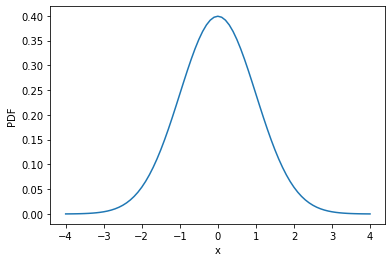

In [8]:
x = np.arange(-4.0,4.05,0.1)
std_norm_pdf = np.exp(-x**2/2)/np.sqrt(2*np.pi)

plt.plot(x,std_norm_pdf)
plt.xlabel('x')
plt.ylabel('PDF');

#### Programming notes 3
The normal distribution is part of the [statistical function library](https://docs.scipy.org/doc/scipy/reference/stats.html) in SciPy, which contains dozens of statistical distributions. Each distribution is defined as a Python object that includes a standard set of functions (or *methods*, in object-oriented programming jargon), including `pdf` for the PDF. Functions for the normal distribution are part of the [`norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) object, and the function that computes its PDF is [`norm.pdf`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html), following the standard object-oriented `<Object>.<Method>` syntax.

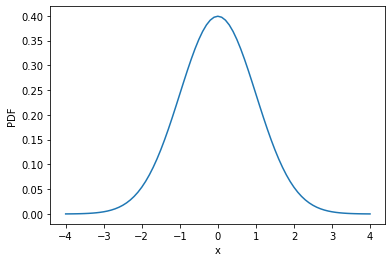

In [9]:
from scipy.stats import norm

x = np.arange(-4.0,4.05,0.1)
std_norm_pdf_alt = norm.pdf(x)

plt.plot(x,std_norm_pdf_alt)
plt.xlabel('x')
plt.ylabel('PDF');

### Aside on the Gaussian integral
You might wonder about the factor of $\sqrt{2\pi}$ in the definition of the normal distribution—it is there to ensure that the probability that $-\infty < x < \infty$ is equal to one:

$$ \int_{-\infty}^{\infty}\text{d}x\, P_\text{DF}(x) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}\text{d}x\,\exp\left(-\frac{x^2}{2}\right) = 1.$$

See the supplementary notebook [2.1](2.1-Evaluating-the-Gaussian-integral.ipynb) for details about how to evalute this integral.

### Sampling the standard normal distribution with `randn`
The cell below uses `randn` to create an array of 1000 normally distributed random numbers and plots them as a histogram.

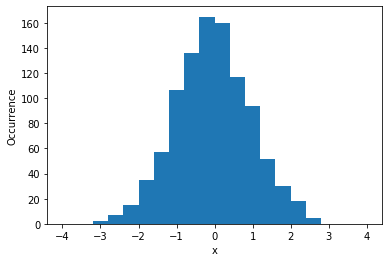

In [10]:
n = 1000
random.seed(0)
x_randn = random.randn(n)

plt.hist(x_randn,bins=20,range=(-4.0,4.0))
plt.xlabel('x')
plt.ylabel('Occurrence');

### The general normal distribution
As with the uniform distribution, we can define a *general normal distribution*,

<a id="eq-normal-pdf"></a>$$\mathcal{N}(x;\mu, \sigma^2) = P_\text{DF}(x;\mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right],$$

which has mean $\mu$ and variance $\sigma^2$, where $\sigma$ is the standard deviation. In this notation the standard normal distribution is written as $\mathcal{N}(x;0,1)$, or $X\sim\mathcal{N}(0,1)$, and again, the upper-case $X$ refers to the population of all $x$, the real numbers. The general normal distribution is related to the standard normal distribution by the substitution

$$ x\rightarrow \frac{x-\mu}{\sigma},$$

which shows that $\mu$ controls the *location* of the distribution and $\sigma$ controls its *width*.

#### Programming notes 4
You can use the  `loc` and `scale` keywords to control $\mu$ and $\sigma$, respectively, in the [`norm.pdf`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) function, as shown in the code cell below.

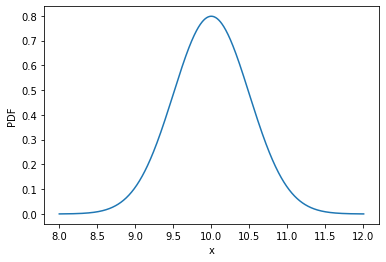

In [11]:
mu = 10
sigma = 0.5

dx = sigma/100
xmin =  mu - 4*sigma
xmax =  mu + 4*sigma
x = np.arange(xmin,xmax + dx,dx)
gen_norm_pdf = norm.pdf(x, loc=mu, scale=sigma)

plt.plot(x,gen_norm_pdf)
plt.xlabel('x')
plt.ylabel('PDF');

### Exercise  6
In the following code cell, initialize the RNG with zero and construct a histogram of 1000 samples from a general normal distribution with $\mu = 10, \sigma = 0.5$. Use 20 bins and choose a range that positions the distribution well in the figure.

In [12]:
# Use this cell for your response, adding cells if necessary.

## Back to the mean and standard deviation
Earlier we used `mean` and `std` to characterize the [location and width](#Location-and-width) of a *sample*. Now we are in a position to return to these calculations and relate them to the mean and standard deviation of the *parent distribution.* We reproduce the earlier calculations with `mean` and `std` in the code cell below. 

In [13]:
period = [10.0, 9.4, 9.8, 9.6, 10.5, 9.8, 10.3, 10.2, 10.4, 9.3]
print("Mean: ", np.mean(period))
print("Standard deviation (corrected): ", np.std(period, ddof=1))

Mean:  9.93
Standard deviation (corrected):  0.419126074906664


### Estimating the parent distribution from a sample
The standard interpretation of these summary statistics is that the measurements are *normally distributed*, and $\bar{x} = 9.93~\text{s}$ and $\sigma_{N-1} = 0.42~\text{s}$ are our *estimates* of the mean and standard deviation, respectively. (We are ignoring, for the moment, the uncertainty in each of these quantities, which we will get to at the end of the notebook. For now we just express them both to two decimal places.) We can represent this graphically by plotting a histogram of the measurements and laying the estimated parent distribution on top of it.

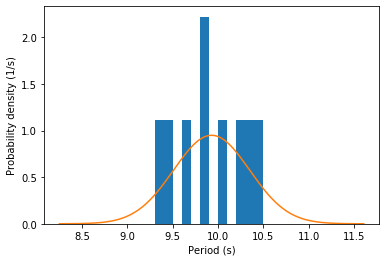

In [14]:
# Set the bins to be 0.1 wide
bin_width = 0.1
edges = np.arange(np.amin(period), np.amax(period) + bin_width, bin_width)

# Plot the histogram as a probability density
plt.hist(period,bins = edges,density=True);

# Set the mean and standard deviation
mu = 9.93
sigma = 0.42

# Calculate the distribution at a dt = 0.01 spacing
dt = 0.01
tmin = mu-4*sigma
tmax = mu+4*sigma
t_dist = np.arange(tmin, tmax + dt, dt)
pdf = norm.pdf(t_dist, loc=mu, scale=sigma)

# Plot the density and label axes
plt.plot(t_dist, pdf)
plt.xlabel('Period (s)')
plt.ylabel('Probability density (1/s)');

### Consistency of the estimates for the mean and standard deviation
As the number of measurements $N$ increases, we expect $\lim_{N\rightarrow\infty}\bar{x}_N = \mu$ (including the subscript $N$ to make its role explicit) and $\lim_{N\rightarrow\infty}\sigma_{N-1} = \sigma$, since the sample distribution should converge to the parent distribution in this limit. Complete [Exercise 7](#Exercise-7) below to check this numerically.

### Exercise 7
Evaluate the code cell below to show the standard normal PDF superposed on a histogram of `n_lim = 10` samples from `randn` with  `n_bin` bins, together with the mean and standard deviation of the sample. Increase `n_lim` by a factor of 10 and reevaluate the cell. Repeat this process until the sample mean and sample standard deviation are within 1 % of their expected values for a few different choices of the seed. Once you have selected `n_lim`, adjust `n_bin` to allow a good comparison between the sample distribution and the standard normal distribution.

N:  10
Mean:  0.7380231707288347
Standard deviation:  1.0193909949356386


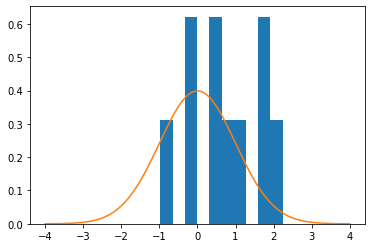

In [15]:
n_lim = 10
n_bin = 10

random.seed(0)
x_n = random.randn(n_lim)

dx = 0.01
x_n_dist = np.arange(-4.0, 4.0 + dx, dx)
x_n_pdf = norm.pdf(x_n_dist)

plt.hist(x_n, bins=n_bin, density=True)
plt.plot(x_n_dist,x_n_pdf);

print('N: ', n_lim)
print('Mean: ', np.mean(x_n))
print('Standard deviation: ', np.std(x_n, ddof=1))

### Determining the mean and variance from the distribution
So far, we have referred to the mean $\mu$, the standard deviation $\sigma$, and the variance $\sigma^2$ as *parameters* that we use to [define the normal distribution](#eq-normal-pdf), but we have referred to the mean $\bar{x}$, the standard deviation $\sigma_{N-1}$, and the variance $\sigma_{N-1}^2$ as *functions* that we apply to a sample from some parent distribution. Now we will close the loop, and define generalizations of these functions to determine the mean $\mu$, the standard deviation $\sigma$, and the variance $\sigma^2$ of arbitrary parent distributions. This will provide us with tools to predict the properties of a sample drawn from a given distribution (see Item 2 in [Goals of statistics](#Goals-of-statistics)).

Starting with the mean, $\mu$, we define it as the *expectation* of $X$, $\text{E}[X]$, given its PDF $P_\text{DF}(x)$, where

$$ \mu = \text{E}[X] = \lim_{N\rightarrow\infty}\frac{1}{N}\sum_{i=1}^{N}x_i
= \int_{-\infty}^{\infty}\text{d}x\,x P_\text{DF}(x). $$

Note that in the $N\rightarrow\infty$ limit we expect $x_i$ to take on *all possible values* for $x$, with a frequency given by the probability density $P_\text{DF}(x)$, which allows us to replace the sum over random $x_i$ with an integral over the domain of $P_\text{DF}(x)$.

Similarly, we define the *variance*, $\sigma^2$, of $X$, $\text{Var}(X)$, as

$$ \sigma^2 = \text{Var}(X) = \lim_{N\rightarrow\infty}\sigma^2_{N-1} = \lim_{N\rightarrow\infty}\sigma^2_{N} = \lim_{N\rightarrow\infty}\frac{1}{N}\sum_{i=1}^{N}(x_i - \bar{x}_n)^2 = \text{E}[(X - \bar{X}_N)^2] = \text{E}[(X - \mu)^2]. $$

The normal distribution is actually *defined* so that the *parameters* $\mu$ and $\sigma^2$ are equal to the *functions* $\text{E}(X)$ and $\text{Var}(X)$.

### The standard error

An important [property](https://en.wikipedia.org/wiki/Variance#Sum_of_uncorrelated_variables_(Bienaym%C3%A9_formula)) of the variance is

$$ \text{Var}\left(\sum_{i=1}^N X_i\right) = \sum_{i=1}^N\text{Var}(X_i),$$

assuming all $X_i$ are uncorrelated—that is, the variance of a sum of uncorrelated random variables is equal to the sum of their variances. This property may then be used to determine the *variance of the sample mean*, $\bar{x}_N$, if we know $\mu$ and $\sigma$:

$$ \text{Var}(\bar{X}_N) = \frac{\sigma^2}{N}.$$

The *standard deviation of the mean,* or *standard error,* is then

$$ \sqrt{\text{Var}(\bar{X}_N)} = \frac{\sigma}{\sqrt{N}}.$$

Typically the true value of $\sigma$ is unknown, so the standard error is estimated from measurements [see *MU* Eq. (2.7)],

$$\alpha = \frac{\sigma_{N-1}}{\sqrt{N}}.$$

This result justifies the practice of averaging measurements to improve the uncertainty. Note, however, that the uncertainty decreases inversely with $\sqrt{N}$, so to reduce the uncertainy by a factor of two it is necessary to perform *four times* as many measurements.

Let's illustrate this by simulating a new set of measurements based on *MU* Table 2.1, assuming $\mu = 9.93$ and $\sigma = 0.42$ are the true values for the parent distribution.

In [16]:
# Set the mean and standard deviation
mu = 9.93
sigma = 0.42

# Seed the RNG and simulate N_meas = 10 measurements
N_meas = 10
random.seed(0)
period_sim = mu + sigma*random.randn(N_meas)

# Return the mean and standard deviation
print("Mean: ", np.mean(period_sim))
print("Standard deviation (corrected): ", np.std(period_sim, ddof=1))

Mean:  10.239969731706111
Standard deviation (corrected):  0.42814421787296836


With  `random.seed(0)`, we get $\bar{x} \approx 10.24~\text{s}$ instead of 9.93 s, and $\sigma_{N-1} \approx 0.43~\text{s}$ instead of 0.42 s. Change the seed and rerun the cell to see how much these two quantities vary.

In the next code cell we simulate 1000 repetitions, each time taking the average $\bar{x}_{N=10}$ of 10 samples. The resulting histogram shows the distribution for $\bar{x}_{N=10}$, which we plot with the expected PDF $\mathcal{N}(x;\mu, \sigma^2/N)$, where the variance has been reduced by $N$.

#### Programming notes 5
One way to run the simulation would be to put the original simulation in a `for` loop with 1000 iterations and store each result. We take a different approach here that does not require a loop. We use `randn` to generate a `10 x 1000` *array* of random numbers, all normally distributed with `mu = 9.93` and `sigma = 0.42`, then take the mean along the first dimension by setting the option `axis=0`. This gives us a one-dimensional array with 1000 elements, `period_mean`, each of which represents one set of 10 measurements.

Standard deviation of the mean:  0.1300344841454658
Standard error of original measurement:  0.13281566172707193


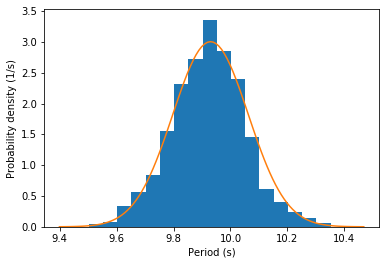

In [17]:
# Set the mean and standard deviation to the
# values estimated from Table 2.1
mu = 9.93
sigma = 0.42

# Seed the RNG and simulate N_rep = 1000 repetitions
# of N_meas = 10 measurements
N_meas = 10
N_rep = 1000
random.seed(0)
period_sim_array = mu + sigma*random.randn(N_meas, N_rep)

# Compute the mean along the first dimension
period_mean = np.mean(period_sim_array, axis=0)

# Compute the sample standard deviation of the mean
std_mean = np.std(period_mean, ddof=1)

# Compute the (true) standard error
alpha = sigma/np.sqrt(N_meas)

# Set the bins to be 0.05 wide
bin_width = 0.05
edges = np.arange(np.amin(period_mean), 
                  np.amax(period_mean) + bin_width, bin_width)

# Make histogram
plt.hist(period_mean, bins=edges, density=True)
plt.xlabel('Period (s)')
plt.ylabel('Probability density (1/s)');

# Calculate the PDF N(xbar,alpha^2) at a dt = 0.01 spacing
# and superpose on the histogram
dt = 0.01
tbar_min = mu-4*sigma/np.sqrt(N_meas)
tbar_max = mu+4*sigma/np.sqrt(N_meas)
t_bar_dist = np.arange(tbar_min, tbar_max + dt, dt)
pdf_tbar = norm.pdf(t_bar_dist, loc=mu, scale=alpha)

plt.plot(t_bar_dist, pdf_tbar)

# Print the standard deviation of the N_rep = 1000 simulated measurements of
# the mean and the standard error computed from the original measurement of
# N_meas = 10 periods
print('Standard deviation of the mean: ', std_mean)
print('Standard error of original measurement: ', sigma/np.sqrt(N_meas))

### The error in the error
As discussed in *MU* Sec. 2.7.1, this uncertainty has its own uncertainty, which we express here as $\sigma(\alpha)$ [see *MU* Eq. (2.8)]:

$$ \sigma(\alpha) = \frac{\alpha}{\sqrt{2N-2}}$$

The next code cell evaluates $\alpha$ for each of the 1000 repetitions of our simulated experiment and compares the distribution to $\mathcal{N}[\alpha,\alpha^2/(2N-2)]$.

Standard deviation of the standard error:  0.029494484752623725
Standard error of original measurement:  0.03130495168499706


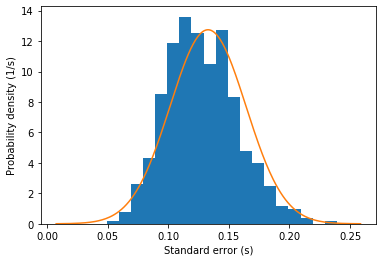

In [18]:
# Set the mean and standard deviation to the
# values estimated from Table 2.1
mu = 9.93
sigma = 0.42

# Seed the RNG and simulate N_rep = 1000 repetitions
# of N_meas = 10 measurements
N_meas = 10
N_rep = 1000
random.seed(0)
period_sim_array = mu + sigma*random.randn(N_meas, N_rep)

# Estimate the standard error along the first dimension
period_stderr = np.std(period_sim_array, axis=0, ddof=1)/np.sqrt(N_meas)

# Compute the sample standard deviation of the standard error
std_stderr = np.std(period_stderr, ddof=1)

# Compute the (true) standard error
alpha = sigma/np.sqrt(N_meas)

# Compute the error in the error from (2.8)
sigma_alpha = alpha/np.sqrt(2*N_meas-2)

# Set the bins to be 0.01 wide
bin_width = 0.01
edges = np.arange(np.amin(period_stderr), np.amax(period_stderr) + bin_width, bin_width)

# Make histogram
plt.hist(period_stderr, bins=edges, density=True)
plt.xlabel('Standard error (s)')
plt.ylabel('Probability density (1/s)');

# Calculate the PDF N(alpha,sigma_alpha^2) at a dt = 0.001 spacing
# and superpose on the histogram
dt = 0.001
sigma_alpha_min = alpha-4*sigma_alpha
sigma_alpha_max = alpha+4*sigma_alpha
sigma_alpha_dist = np.arange(sigma_alpha_min, sigma_alpha_max + dt, dt)
pdf_sigma_alpha = norm.pdf(sigma_alpha_dist, loc=alpha, scale=sigma_alpha)

plt.plot(sigma_alpha_dist, pdf_sigma_alpha);

# Print the standard deviation of the N_rep = 1000 simulated measurements of
# the standard error, and the uncertainty computed with MU Eq. (2.8) with data 
# from the original measurement of N_meas = 10 periods
print('Standard deviation of the standard error: ', std_stderr)
print('Standard error of original measurement: ', sigma_alpha)

## Reporting results
We are now in a position to summarize the results from Table 2.1 of *MU*, following the steps given in *MU* Sec. 2.8.

1. Compute the mean, keeping all significant figures: `xbar = 9.93` (s).
2. Compute the standard error, keeping all significant figures: `alpha = 0.13281566172707193` (s).
3. Determine the appropriate number of significant figures to report: here, we have `sigma_alpha = 0.03130495168499706`, so we report both `alpha` and `xbar` to two decimal places (*MU* recommends only one decimal place, which is also reasonable in this instance).
4. Round the mean to the appropriate decimal place and report the result with an uncertainty of one standard error: $T = (9.93\pm 0.13)~\text{s}$ [or, following *MU*, $T = (9.9\pm 0.1)~\text{s}$].

### How to interpret the mean ± the standard error
The following code cell plots the mean of 100 of our simulated experiments with vertical error bars that extend over $\bar{x}\pm\alpha$, and the population mean $\mu$ is shown with a red horizontal line. Several things are worth noticing.

1. Many (25 of the first 100) of the sample means lie more than one standard error from the true mean.
2. The standard errors fluctuate.
3. Whether a sample mean lies within one standard error of the true mean depends on *both* the distance of the sample mean to the true mean *and* the size of the standard error.
4. If you set `N_meas = 3` and repeat the cell computation, you should see a greater number of sample means that lie more than one standard error from the true mean, and that the standard error fluctuations are larger.  Set `N_meas = 2` and both effects become even more pronounced.

These observations provide some guidance toward correctly understanding the mean ± the standard error. In repeated  measurements, the mean ± the standard error defines a range that will include the true value most of the time. If $N\gtrsim  6$, the range will include the true value in about 2/3 of the measurements, as expected for a normal distribution with a standard deviation given by the standard error. For $N<6$, however, the fluctuations in $\sigma_{N-1}$ become large enough to introduce significant deviations from these expectations. (The true distribution is not quite normal, but a Student *t*-distribution, which is discussed in *MU* Sec. 8.8.)

The simulation also reveals the flaws in some common misconceptions about the standard error.

1. The probability that the true value either lies within a *given* mean ± the standard error range is either 0% or 100%, and your measurement doesn't tell you which it is. It is *incorrect* to say that the mean ± standard error range provides a range that has a 68% (or other intermediate) probability of containing the true value.
2. A measurement that lies more than one or even two standard errors from the expected value is *not necessarily wrong,* as it may arise from a statistical fluctuation.
3. Measurement uncertainty fluctuates, especially if $N$ is small. A change in $\alpha$ of a factor of two is not necessarily an indication that something changed in the experiment.
4. The probability distribution for the mean ± the standard error range to cover the true value is not a normal distribution, although it approaches one as $N$ increases above about 6

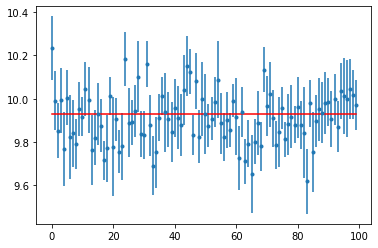

In [44]:
# Set the mean and standard deviation to the
# values estimated from Table 2.1
mu = 9.93
sigma = 0.42

# Seed the RNG and simulate N_rep = 1000 repetitions
# of N_meas = 10 measurements
N_meas = 10
N_rep = 1000
random.seed(0)
period_sim_array = mu + sigma*random.randn(N_meas, N_rep)

# Compute the mean along the first dimension
period_mean = np.mean(period_sim_array, axis=0)

# Compute the standard error along the first dimension
period_stderr = np.std(period_sim_array, axis=0, ddof=1)/np.sqrt(N_meas)

n_show = 100
plt.errorbar(np.arange(n_show), period_mean[:n_show], yerr=period_stderr[:n_show], fmt='.');
plt.plot(np.arange(n_show), mu*np.ones(n_show), 'r-');

### Formatting numbers in Python

## Summary
Here is a list of what you should be able to do after completing this notebook.
* Compute basic statistics on a set of numbers using NumPy, including `mean`, `median`, `std`, `var`, `amin`, `amax`, and `ptp`.
* Recognize the significance of the `ddof` option in `std` and `var` and use it appropriately.
* Use `sum` and `len` from NumPy and the Python standard library, respectively, to compute the standard deviation and variance of a set of numbers without using `std` or `var`.
* Describe the limitations of floating-point calculations and be able to recognize them when you encounter them.
* Express the parent distributions for `rand` and `randn` in mathematical notation.
* Use `rand` and `randn` to generate samples from general uniform and general normal distributions, respectively.
* Compute the standard error for a set of measurements.
* Format numerical expressions in Python.

## Further reading
Wikipedia, [Variance](https://en.wikipedia.org/wiki/Variance). Discusses many of the properties of the variance, including proofs of important theorems and identities.